In [8]:
# ============================================================================ #
# HEALTH DATA PREPROCESSING & EDA NOTEBOOK (FROM EXCEL FILES)
# ============================================================================ #

# --------------------- IMPORTS --------------------- #
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings

warnings.filterwarnings('ignore')
sns.set(style="whitegrid")

print("="*70)
print("HEALTH DATA PREPROCESSING & EDA - NOTEBOOK VERSION")
print("="*70)

# --------------------- PATHS --------------------- #
NOTEBOOK_DIR = os.getcwd()
PROJECT_ROOT = os.path.dirname(NOTEBOOK_DIR)  # assuming notebooks folder is inside project root
DATA_DIR = os.path.join(PROJECT_ROOT, "data")

DATASET1_PATH = os.path.join(DATA_DIR, 'dataset1.xlsm')
DATASET2_PATH = os.path.join(DATA_DIR, 'dataset2.xlsm')

# --------------------- LOAD EXCEL FILES --------------------- #
try:
    df1 = pd.read_excel(DATASET1_PATH)
    df2 = pd.read_excel(DATASET2_PATH)
    print(f"✓ Dataset 1 loaded: {df1.shape[0]} rows, {df1.shape[1]} columns")
    print(f"✓ Dataset 2 loaded: {df2.shape[0]} rows, {df2.shape[1]} columns")
except Exception as e:
    print(f"✗ Error loading datasets: {e}")
    raise

HEALTH DATA PREPROCESSING & EDA - NOTEBOOK VERSION
✓ Dataset 1 loaded: 2000 rows, 14 columns
✓ Dataset 2 loaded: 20000 rows, 3 columns


In [11]:
# ================= STEP 1: INITIAL EXPLORATION ================= #
print("\n" + "="*70)
print("[STEP 1] Initial Data Exploration")
print("="*70)

# ----- Dataset 1 ----- #
print("\n--- Dataset 1 Info ---")
print(f"Shape: {df1.shape}")
print(f"\nColumns: {list(df1.columns)}")
print(f"\nData Types:\n{df1.dtypes}")
print(f"\nFirst few rows:\n{df1.head()}")
print(f"\nBasic Statistics:\n{df1.describe()}")

# ----- Dataset 2 ----- #
print("\n--- Dataset 2 Info ---")
print(f"Shape: {df2.shape}")
print(f"\nColumns: {list(df2.columns)}")
print(f"\nData Types:\n{df2.dtypes}")
print(f"\nFirst few rows:\n{df2.head()}")
print(f"\nBasic Statistics:\n{df2.describe()}")



[STEP 1] Initial Data Exploration

--- Dataset 1 Info ---
Shape: (2000, 14)

Columns: ['Patient_Number', 'Blood_Pressure_Abnormality', 'Level_of_Hemoglobin', 'Genetic_Pedigree_Coefficient', 'Age', 'BMI', 'Sex', 'Pregnancy', 'Smoking', 'salt_content_in_the_diet', 'alcohol_consumption_per_day', 'Level_of_Stress', 'Chronic_kidney_disease', 'Adrenal_and_thyroid_disorders']

Data Types:
Patient_Number                     int64
Blood_Pressure_Abnormality         int64
Level_of_Hemoglobin              float64
Genetic_Pedigree_Coefficient     float64
Age                                int64
BMI                                int64
Sex                                int64
Pregnancy                        float64
Smoking                            int64
salt_content_in_the_diet           int64
alcohol_consumption_per_day      float64
Level_of_Stress                    int64
Chronic_kidney_disease             int64
Adrenal_and_thyroid_disorders      int64
dtype: object

First few rows:
   Patien


[STEP 2] Missing Values Visualization


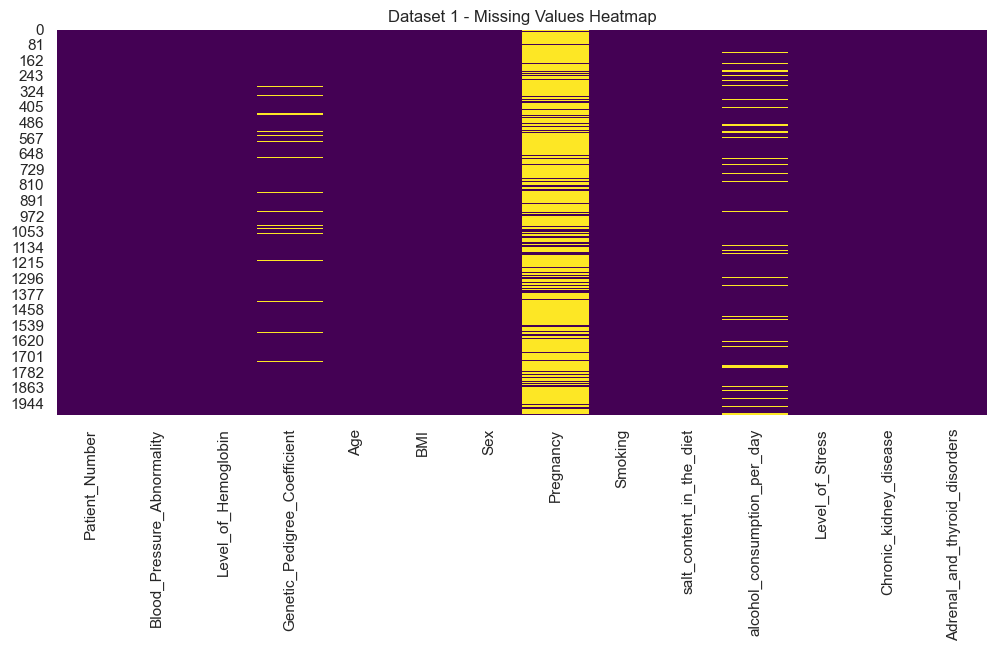

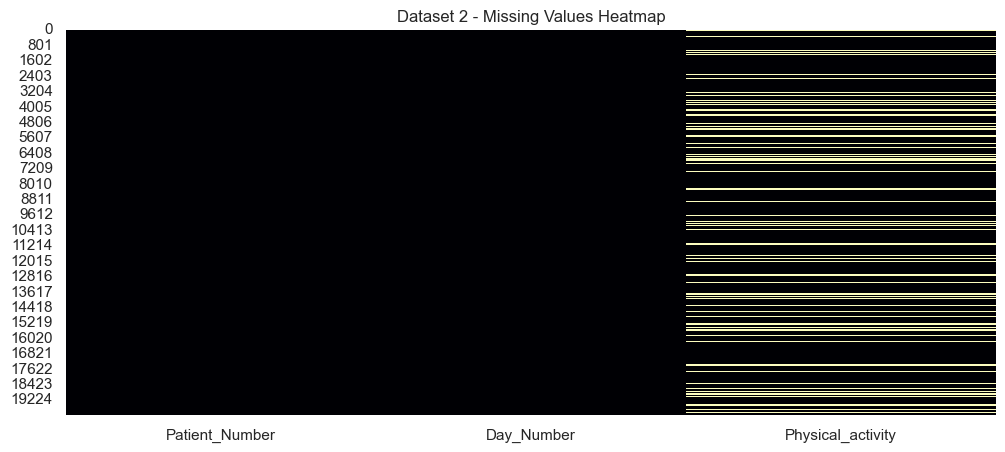

In [12]:
# ================= STEP 2: MISSING VALUE VISUALIZATION ================= #
print("\n" + "="*70)
print("[STEP 2] Missing Values Visualization")
print("="*70)

plt.figure(figsize=(12,5))
sns.heatmap(df1.isnull(), cbar=False, cmap='viridis')
plt.title("Dataset 1 - Missing Values Heatmap")
plt.show()

plt.figure(figsize=(12,5))
sns.heatmap(df2.isnull(), cbar=False, cmap='magma')
plt.title("Dataset 2 - Missing Values Heatmap")
plt.show()

In [13]:
# ================= STEP 3: NUMERIC / CATEGORICAL SPLIT ================= #
numeric_cols1 = df1.select_dtypes(include=['int64','float64']).columns.tolist()
categorical_cols1 = df1.select_dtypes(include=['object']).columns.tolist()

numeric_cols2 = df2.select_dtypes(include=['int64','float64']).columns.tolist()
categorical_cols2 = df2.select_dtypes(include=['object']).columns.tolist()

print("\nDataset 1 - Numeric columns:", numeric_cols1)
print("Dataset 1 - Categorical columns:", categorical_cols1)

print("\nDataset 2 - Numeric columns:", numeric_cols2)
print("Dataset 2 - Categorical columns:", categorical_cols2)


Dataset 1 - Numeric columns: ['Patient_Number', 'Blood_Pressure_Abnormality', 'Level_of_Hemoglobin', 'Genetic_Pedigree_Coefficient', 'Age', 'BMI', 'Sex', 'Pregnancy', 'Smoking', 'salt_content_in_the_diet', 'alcohol_consumption_per_day', 'Level_of_Stress', 'Chronic_kidney_disease', 'Adrenal_and_thyroid_disorders']
Dataset 1 - Categorical columns: []

Dataset 2 - Numeric columns: ['Patient_Number', 'Day_Number', 'Physical_activity']
Dataset 2 - Categorical columns: []


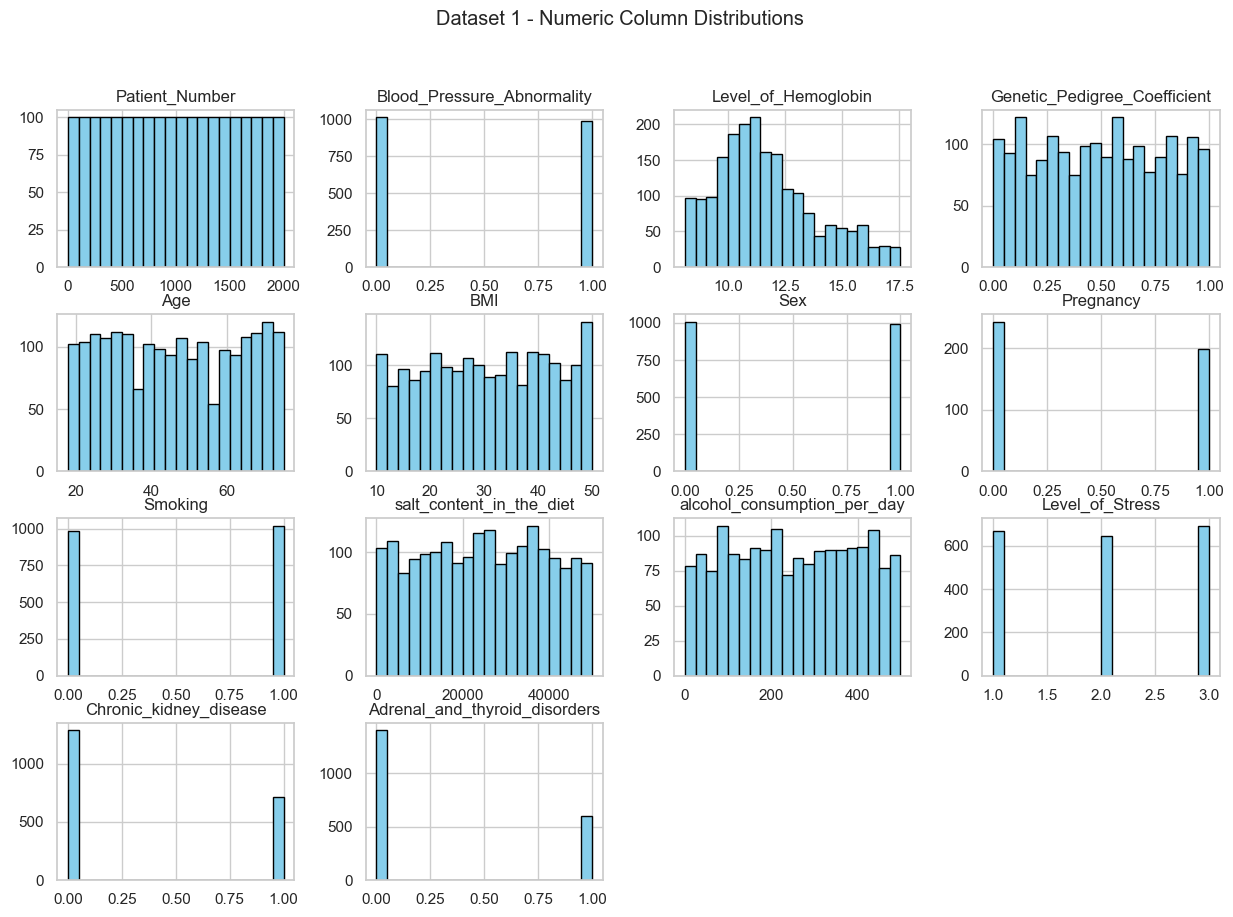

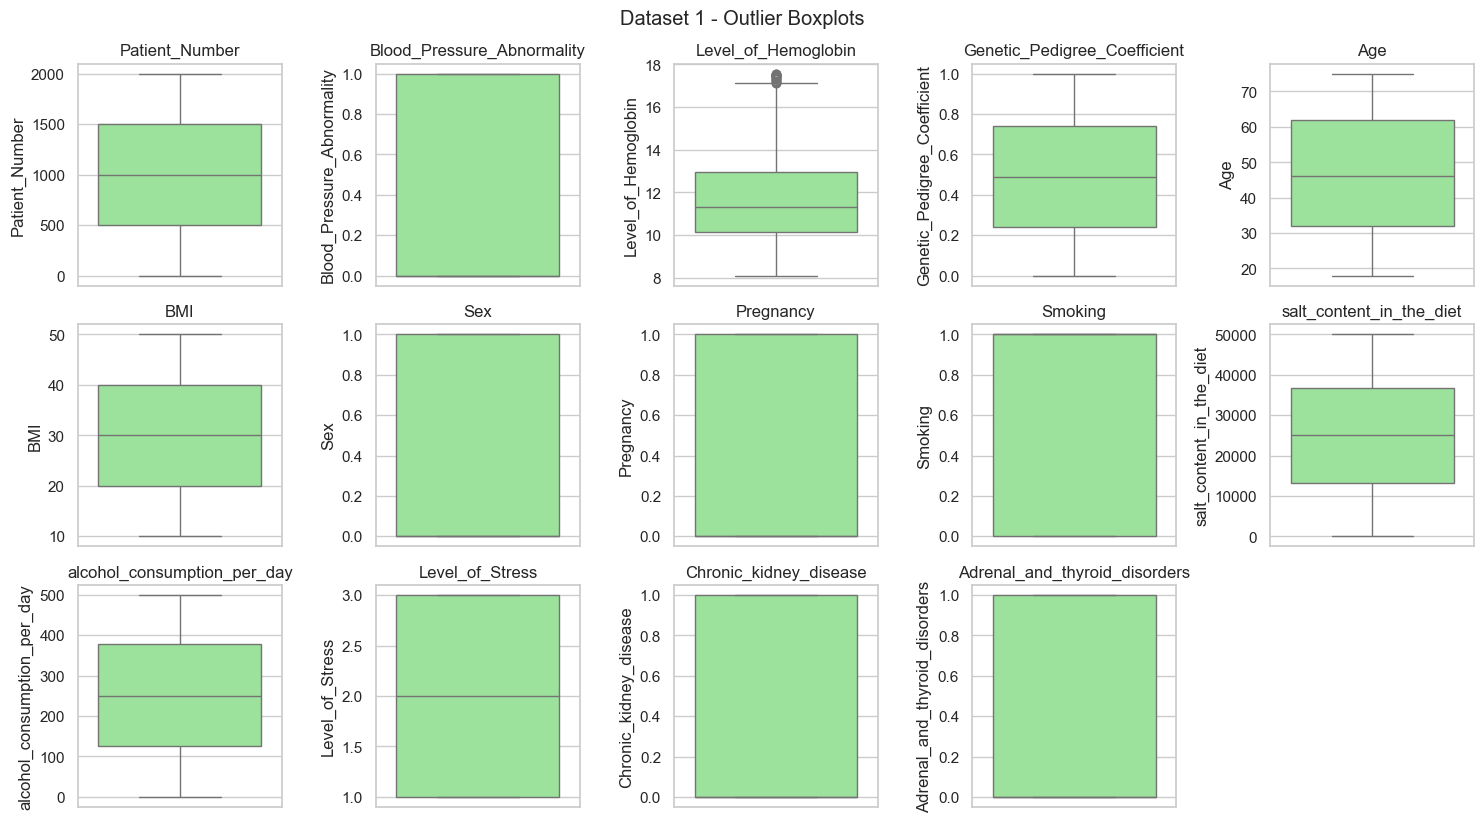

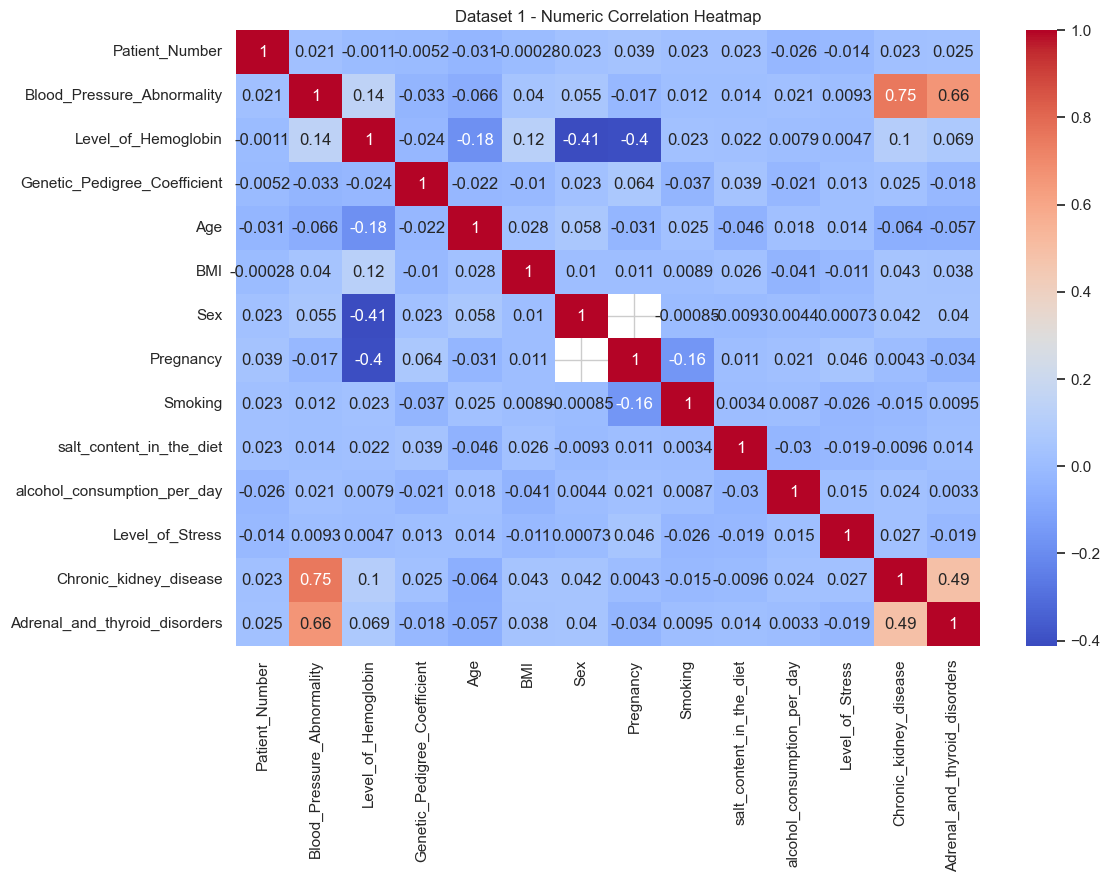

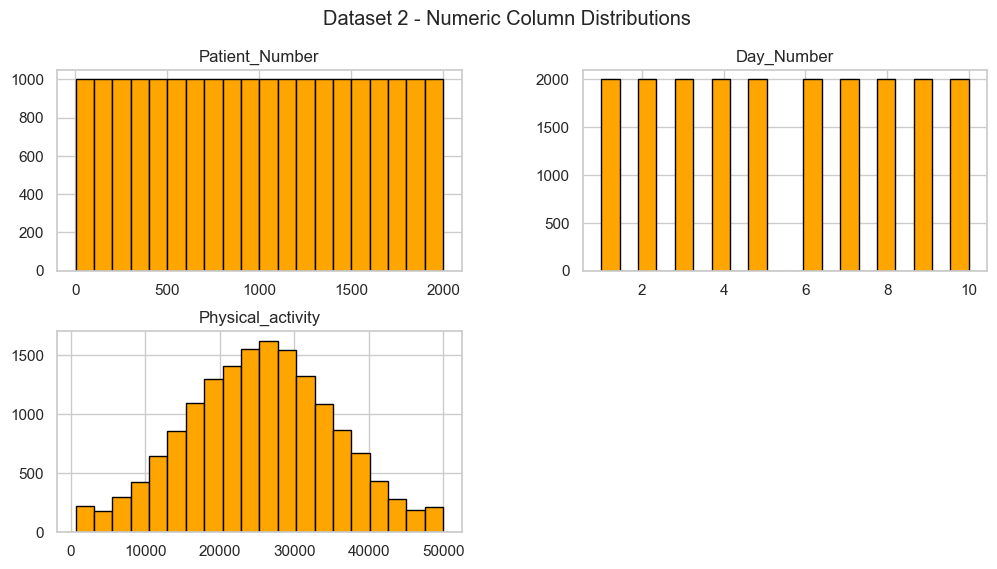

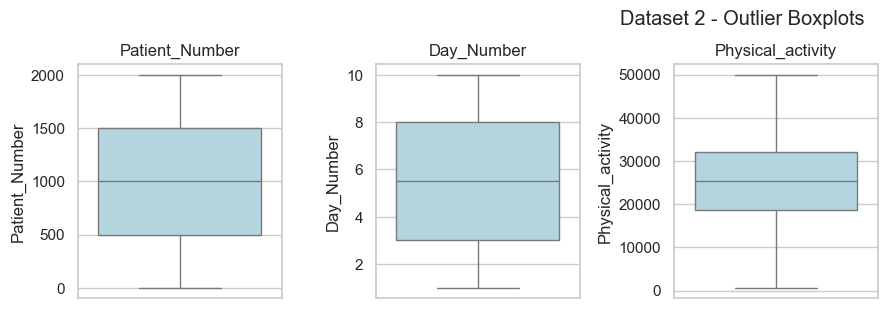

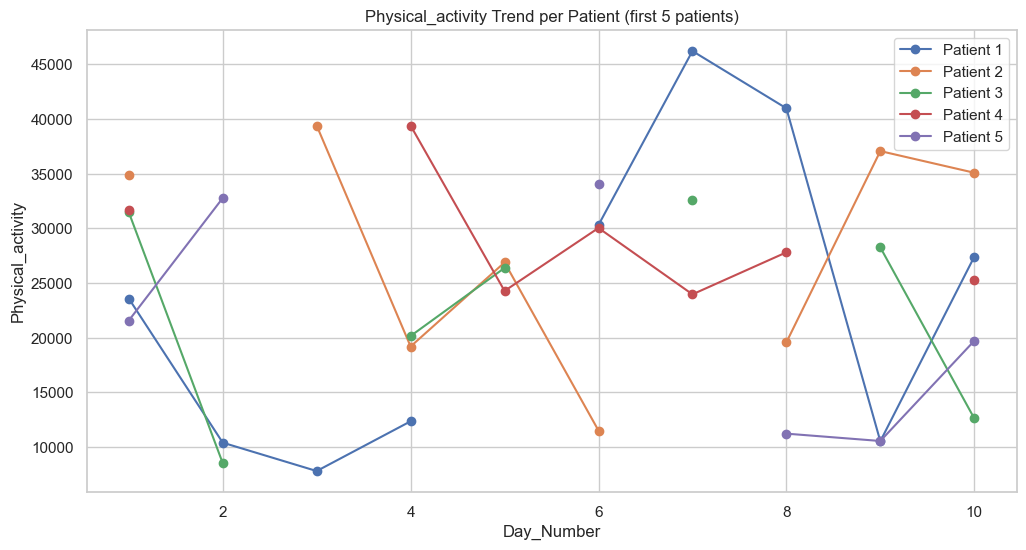


✅ Notebook EDA & Outlier Visualization Completed Successfully!


In [15]:
# ================= STEP 4: VISUALIZATION ================= #
# --- Numeric distributions Dataset 1 --- #
df1[numeric_cols1].hist(figsize=(15,10), bins=20, color='skyblue', edgecolor='black')
plt.suptitle("Dataset 1 - Numeric Column Distributions")
plt.show()

# --- Boxplots for outlier detection Dataset 1 --- #
plt.figure(figsize=(15,8))
for i, col in enumerate(numeric_cols1, 1):
    plt.subplot(3, 5, i)
    sns.boxplot(y=df1[col], color='lightgreen')
    plt.title(col)
plt.tight_layout()
plt.suptitle("Dataset 1 - Outlier Boxplots", y=1.02)
plt.show()

# --- Correlation Heatmap Dataset 1 --- #
plt.figure(figsize=(12,8))
sns.heatmap(df1[numeric_cols1].corr(), annot=True, cmap='coolwarm')
plt.title("Dataset 1 - Numeric Correlation Heatmap")
plt.show()

# --- Categorical value counts Dataset 1 --- #
for col in categorical_cols1:
    plt.figure(figsize=(6,4))
    df1[col].value_counts().plot(kind='bar', title=col)
    plt.show()

# --- Numeric distributions Dataset 2 --- #
df2[numeric_cols2].hist(figsize=(12,6), bins=20, color='orange', edgecolor='black')
plt.suptitle("Dataset 2 - Numeric Column Distributions")
plt.show()

# --- Boxplots for outlier detection Dataset 2 --- #
plt.figure(figsize=(15,8))
for i, col in enumerate(numeric_cols2, 1):
    plt.subplot(3, 5, i)
    sns.boxplot(y=df2[col], color='lightblue')
    plt.title(col)
plt.tight_layout()
plt.suptitle("Dataset 2 - Outlier Boxplots", y=1.02)
plt.show()

# --- Physical_activity trend per patient (first 5 patients) --- #
plt.figure(figsize=(12,6))
for patient in df2['Patient_Number'].unique()[:5]:
    patient_data = df2[df2['Patient_Number']==patient]
    plt.plot(patient_data['Day_Number'], patient_data['Physical_activity'], marker='o', label=f'Patient {patient}')
plt.xlabel("Day_Number")
plt.ylabel("Physical_activity")
plt.title("Physical_activity Trend per Patient (first 5 patients)")
plt.legend()
plt.show()

print("\n✅ Notebook EDA & Outlier Visualization Completed Successfully!")

In [16]:
import sqlite3
import pandas as pd

# Paths to your databases
db_paths = [
    r"D:\infogain_health_data_analysis\preprocessing_dataset_1.db",
    r"D:\infogain_health_data_analysis\preprocessing_dataset_2.db"
]

for db_path in db_paths:
    print(f"\n{'='*50}\nInspecting database: {db_path}\n{'='*50}")
    
    # Connect to SQLite DB
    conn = sqlite3.connect(db_path)
    cursor = conn.cursor()
    
    # List all tables
    cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
    tables = cursor.fetchall()
    print(f"Tables found: {[t[0] for t in tables]}\n")
    
    # Preview first 5 rows from each table
    for table_name in [t[0] for t in tables]:
        print(f"--- Table: {table_name} ---")
        df = pd.read_sql(f"SELECT * FROM {table_name} LIMIT 5;", conn)
        print(df)
        print()
    
    conn.close()



Inspecting database: D:\infogain_health_data_analysis\preprocessing_dataset_1.db
Tables found: ['preprocessing_dataset_1']

--- Table: preprocessing_dataset_1 ---
   Patient_Number  Blood_Pressure_Abnormality  Level_of_Hemoglobin  \
0               1                           1                11.28   
1               2                           0                 9.75   
2               3                           1                10.79   
3               4                           0                11.00   
4               5                           1                14.17   

   Genetic_Pedigree_Coefficient  Age  BMI  Sex  Pregnancy  Smoking  \
0                          0.90   34   23    1          1        0   
1                          0.23   54   33    1          0        0   
2                          0.91   70   49    0          0        0   
3                          0.43   71   50    0          0        0   
4                          0.83   52   19    0          0        